In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_df=sns.load_dataset('titanic')

In [3]:
print(titanic_df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
titanic_df.to_excel('titanic_1.xlsx', index=False)


In [5]:
survived_count = titanic_df[titanic_df['survived'] == 1].shape[0]
total_count = titanic_df['survived'].shape[0]
survival_rate = (survived_count / total_count)*100

In [6]:
survival_rate

38.38383838383838

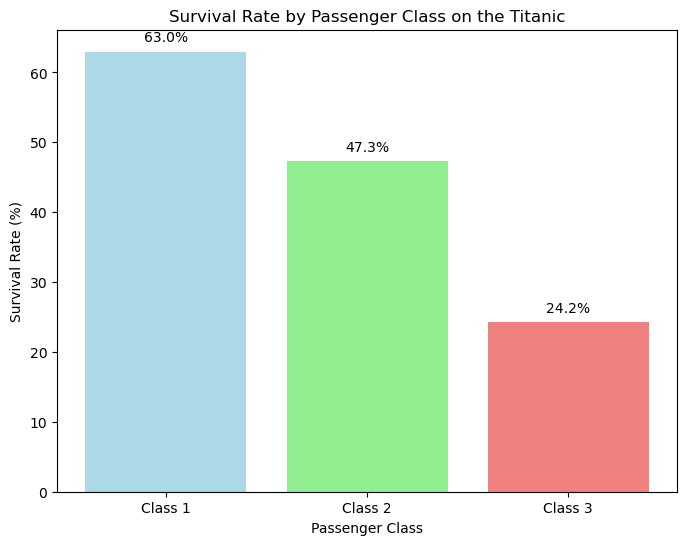

In [7]:
# Calculate the survival rate for each passenger class
survival_rate_by_class = titanic_df.groupby('pclass')['survived'].mean()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_class * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(survival_rate_percentage.index, survival_rate_percentage.values, color=['lightblue', 'lightgreen', 'lightcoral'])

# Add titles and labels
plt.title('Survival Rate by Passenger Class on the Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')

# Customize x-axis labels
plt.xticks(ticks=[1, 2, 3], labels=['Class 1', 'Class 2', 'Class 3'])

# Add labels on the upper part of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Display the chart
plt.show()

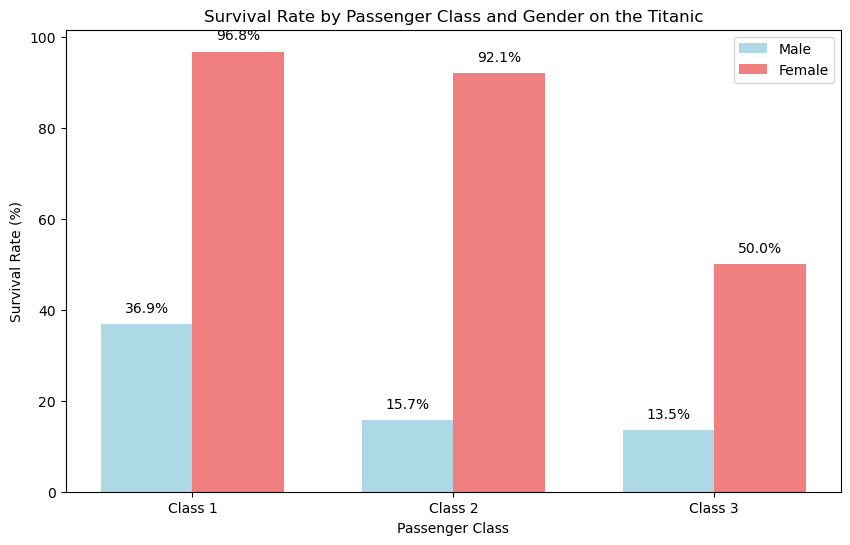

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the survival rate for each passenger class and gender
survival_rate_by_class_gender = titanic_df.groupby(['pclass', 'sex'])['survived'].mean().unstack()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_class_gender * 100

# Define the position of the bars on the x-axis
x = np.arange(len(survival_rate_percentage.index))  # the label locations
width = 0.35  # the width of the bars

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each gender
bars1 = ax.bar(x - width/2, survival_rate_percentage['male'], width, label='Male', color='lightblue')
bars2 = ax.bar(x + width/2, survival_rate_percentage['female'], width, label='Female', color='lightcoral')

# Add titles and labels
ax.set_title('Survival Rate by Passenger Class and Gender on the Titanic')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survival Rate (%)')
ax.set_xticks(x)
ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.legend()

# Add labels on the upper part of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Display the chart
plt.show()

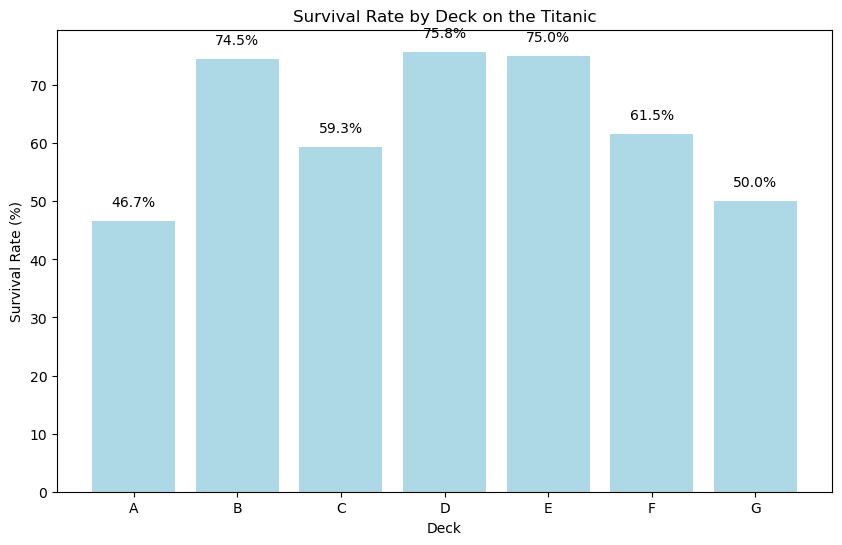

In [9]:
survival_rate_by_deck = titanic_df.groupby('deck')['survived'].mean()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_deck * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(survival_rate_percentage.index, survival_rate_percentage.values, color='lightblue')

# Add titles and labels
plt.title('Survival Rate by Deck on the Titanic')
plt.xlabel('Deck')
plt.ylabel('Survival Rate (%)')

# Add labels on the upper part of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

# Display the chart
plt.show()

posx and posy should be finite values
posx and posy should be finite values


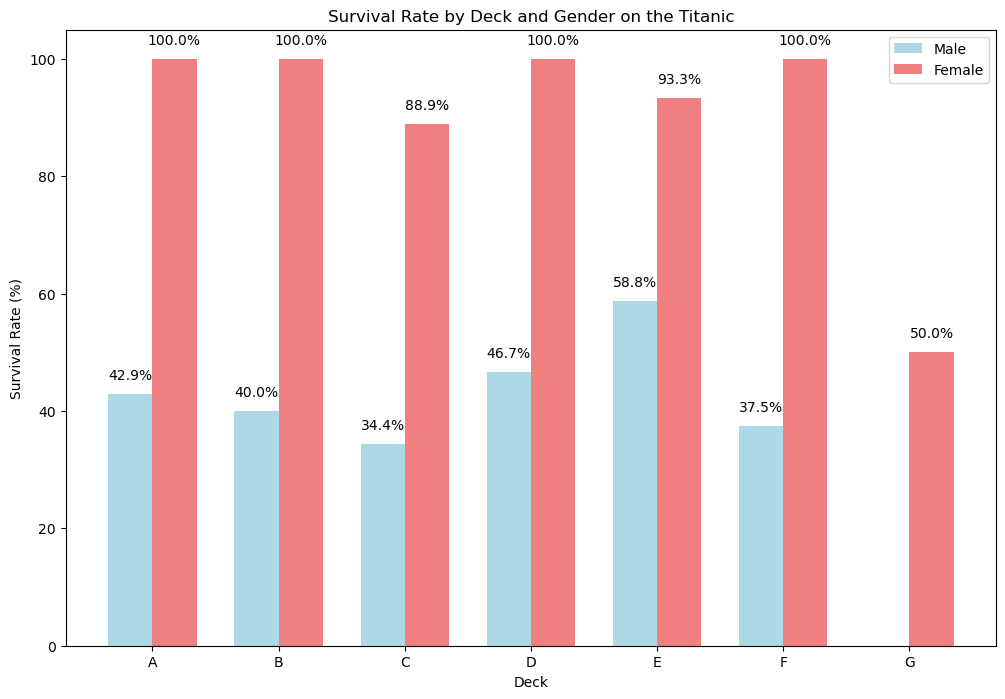

In [10]:
survival_rate_by_deck_gender = titanic_df.groupby(['deck', 'sex'])['survived'].mean().unstack()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_deck_gender * 100

# Define the positions of the bars on the x-axis
decks = survival_rate_percentage.index
x = np.arange(len(decks))  # the label locations
width = 0.35  # the width of the bars

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each gender
bars1 = ax.bar(x - width/2, survival_rate_percentage['male'], width, label='Male', color='lightblue')
bars2 = ax.bar(x + width/2, survival_rate_percentage['female'], width, label='Female', color='lightcoral')

# Add titles and labels
ax.set_title('Survival Rate by Deck and Gender on the Titanic')
ax.set_xlabel('Deck')
ax.set_ylabel('Survival Rate (%)')
ax.set_xticks(x)
ax.set_xticklabels(decks)
ax.legend()

# Add labels on the upper part of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Display the chart
plt.show()

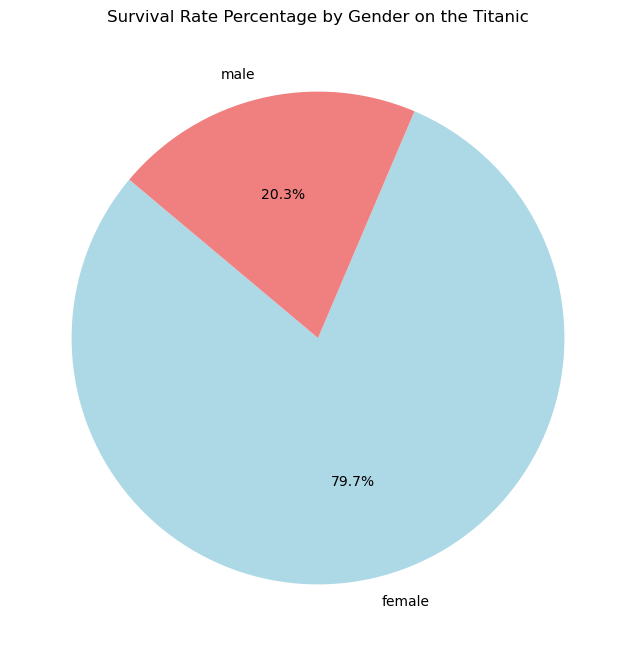

In [11]:
survival_rate_by_gender = titanic_df.groupby('sex')['survived'].mean()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_gender * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    survival_rate_percentage,
    labels=survival_rate_percentage.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue', 'lightcoral']
)

# Add a title
plt.title('Survival Rate Percentage by Gender on the Titanic')

# Display the chart
plt.show()

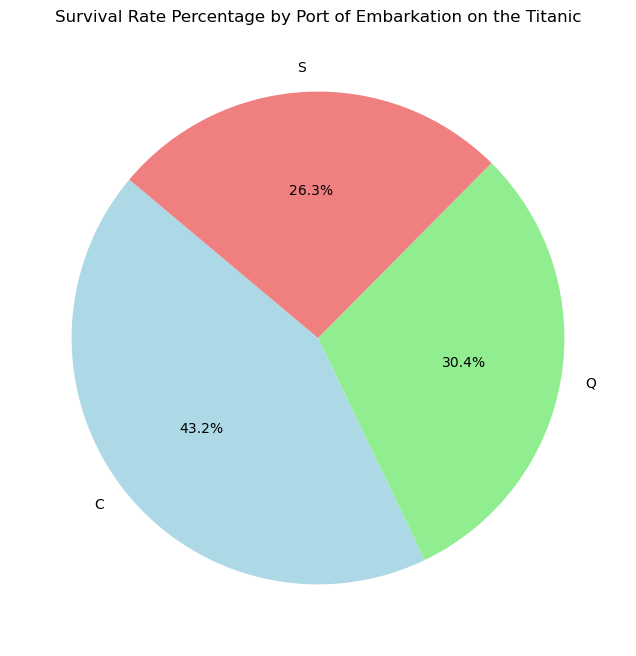

In [12]:
survival_rate_percentage = titanic_df.groupby(['embarked'])['survived'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    survival_rate_percentage,
    labels=survival_rate_percentage.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue', 'lightgreen', 'lightcoral']
)

# Add a title
plt.title('Survival Rate Percentage by Port of Embarkation on the Titanic')

# Display the chart
plt.show()

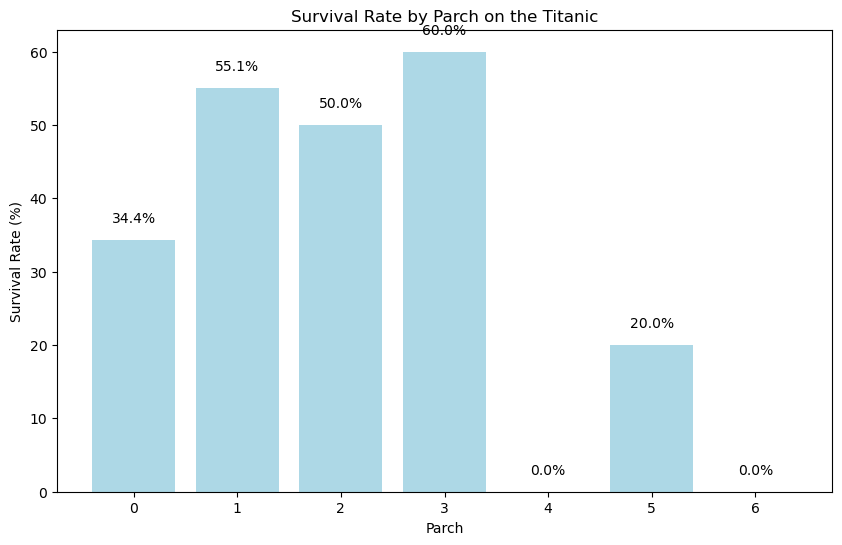

In [23]:
survival_rate_by_parch = titanic_df.groupby('parch')['survived'].mean()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_parch * 100
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(survival_rate_percentage.index, survival_rate_percentage.values, color='lightblue')

# Add titles and labels
plt.title('Survival Rate by Parch on the Titanic')
plt.xlabel('Parch')
plt.ylabel('Survival Rate (%)')

# Add labels on the upper part of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

# Display the chart
plt.show()

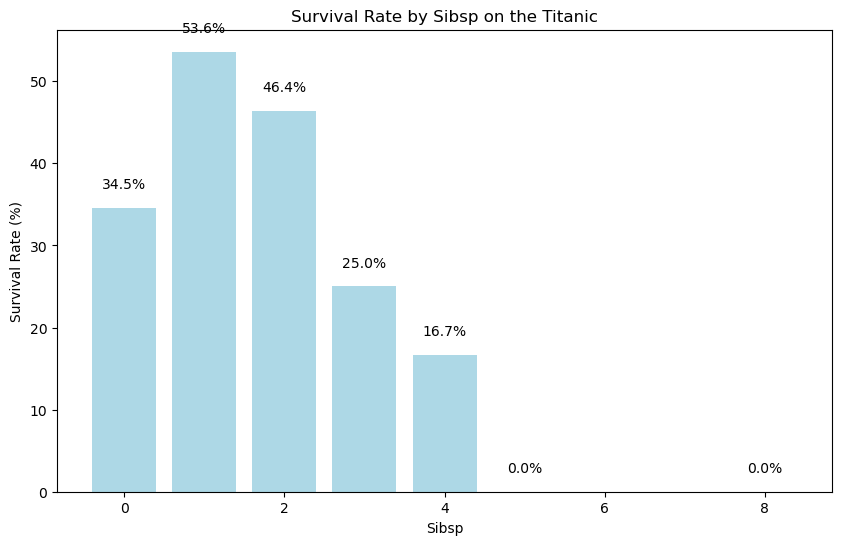

In [14]:
survival_rate_by_sibsp = titanic_df.groupby('sibsp')['survived'].mean()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_sibsp* 100
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(survival_rate_percentage.index, survival_rate_percentage.values, color='lightblue')

# Add titles and labels
plt.title('Survival Rate by Sibsp on the Titanic')
plt.xlabel('Sibsp')
plt.ylabel('Survival Rate (%)')

# Add labels on the upper part of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

# Display the chart
plt.show()

posx and posy should be finite values
posx and posy should be finite values


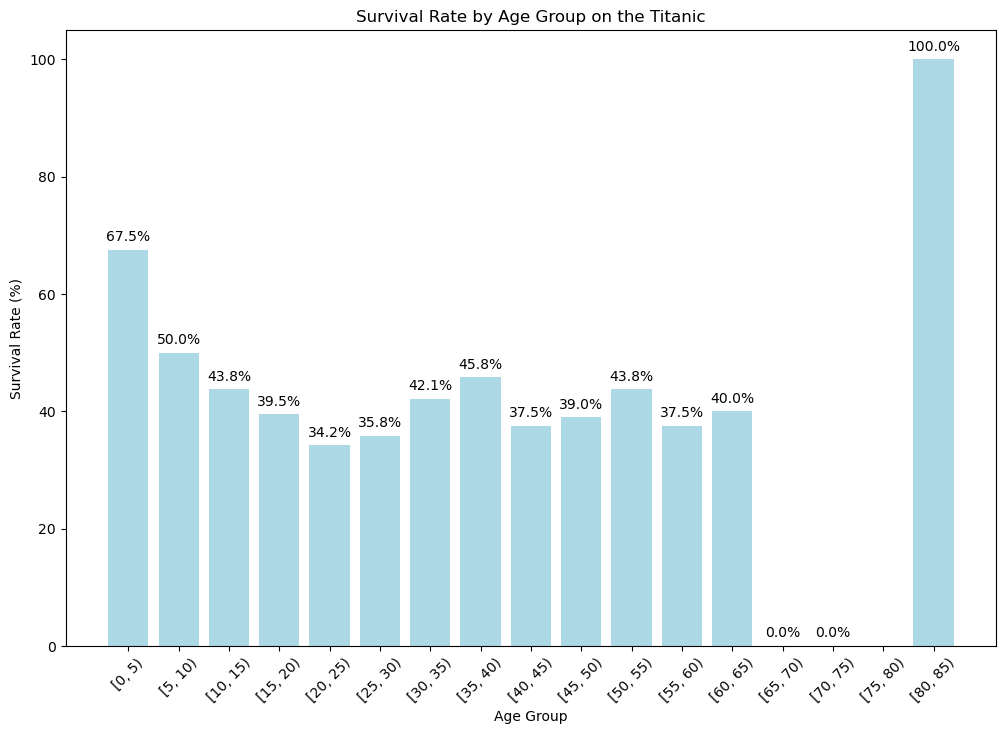

In [15]:
# Create age bins in increments of 5 years
age_bins = range(0, 90, 5)  # Adjust the range based on your data
titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=age_bins, right=False)

# Calculate the survival rate for each age group
survival_rate_by_age_group = titanic_df.groupby('age_group')['survived'].mean()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_age_group * 100

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(survival_rate_percentage.index.astype(str), survival_rate_percentage.values, color='lightblue')

# Add titles and labels
plt.title('Survival Rate by Age Group on the Titanic')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels on the upper part of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Display the chart
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


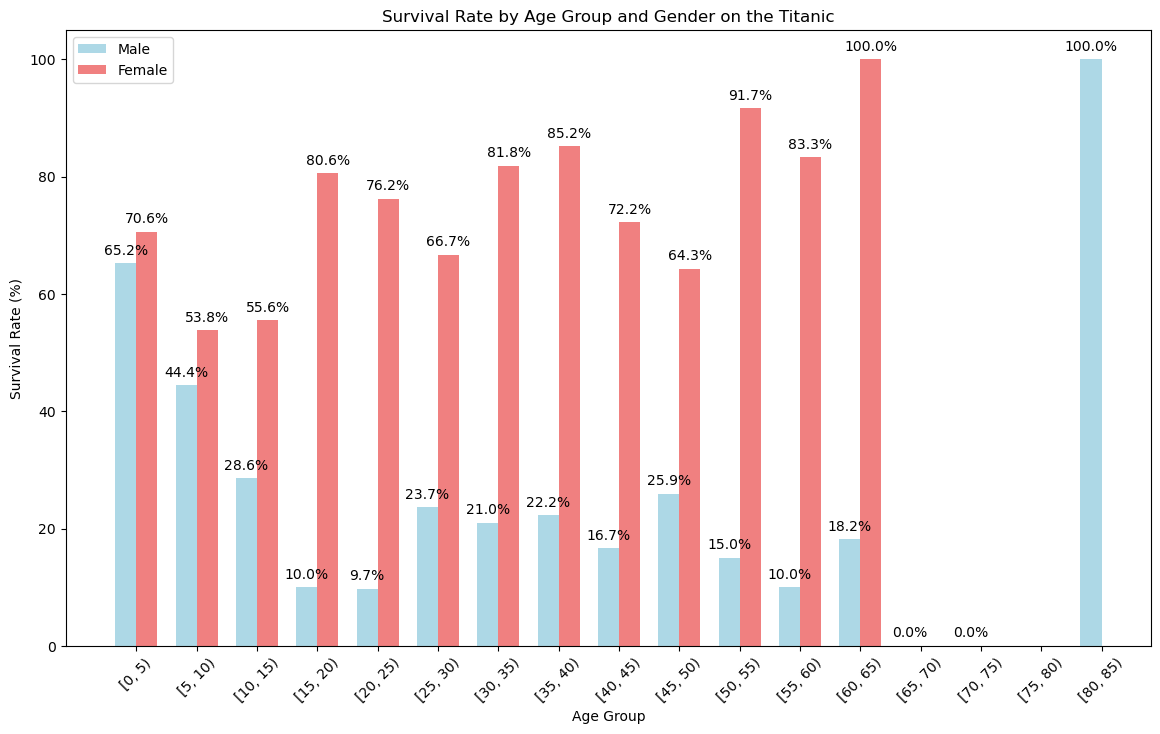

In [16]:
age_bins = range(0, 90, 5)
titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=age_bins, right=False)

# Calculate the survival rate for each age group and gender
survival_rate_by_age_sex = titanic_df.groupby(['age_group', 'sex'])['survived'].mean().unstack()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_age_sex * 100

# Create the positions for the bars on the x-axis
age_groups = survival_rate_percentage.index.astype(str)
x = np.arange(len(age_groups))  # the label locations
width = 0.35  # the width of the bars

# Create the bar chart
plt.figure(figsize=(14, 8))
bars1 = plt.bar(x - width/2, survival_rate_percentage['male'], width, label='Male', color='lightblue')
bars2 = plt.bar(x + width/2, survival_rate_percentage['female'], width, label='Female', color='lightcoral')

# Add titles and labels
plt.title('Survival Rate by Age Group and Gender on the Titanic')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')

# Set the x-ticks to the age groups
plt.xticks(ticks=x, labels=age_groups, rotation=45)

# Add labels on the upper part of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Add legend
plt.legend()

# Display the chart
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


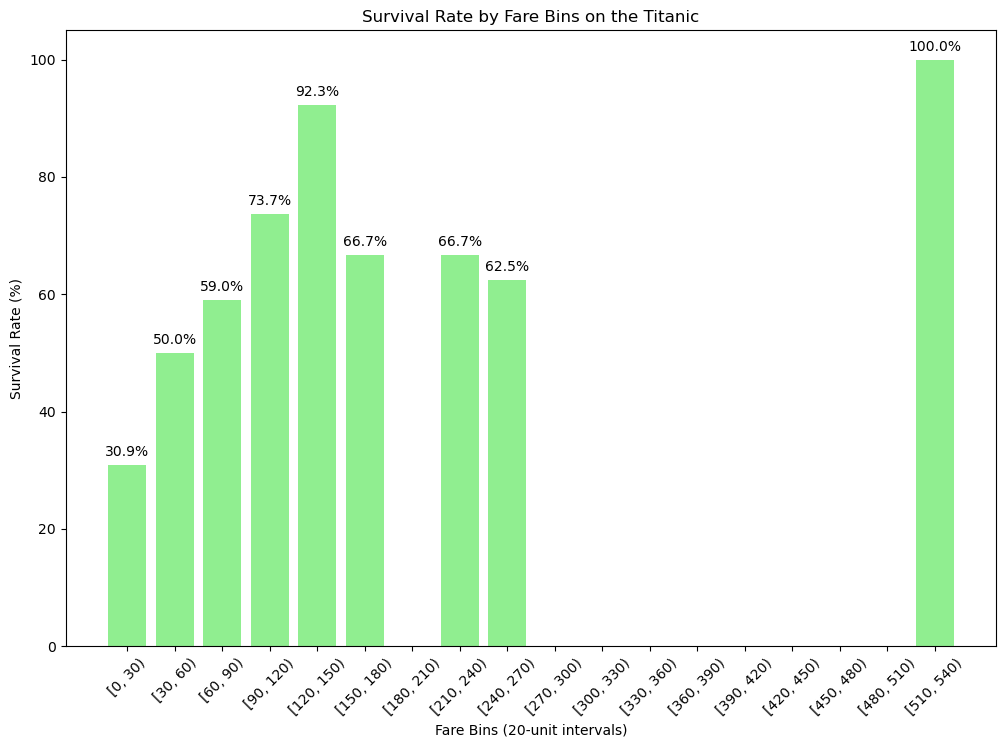

In [18]:
# Determine the maximum fare in the dataset
max_fare = titanic_df['fare'].max()

# Create fare bins in increments of 20 units
fare_bins = range(0, int(max_fare) + 40, 30)
titanic_df['fare_group'] = pd.cut(titanic_df['fare'], bins=fare_bins, right=False)

# Calculate the survival rate for each fare bin
survival_rate_by_fare_group = titanic_df.groupby('fare_group')['survived'].mean()

# Convert survival rates to percentages
survival_rate_percentage = survival_rate_by_fare_group * 100

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(survival_rate_percentage.index.astype(str), survival_rate_percentage.values, color='lightgreen')

# Add titles and labels
plt.title('Survival Rate by Fare Bins on the Titanic')
plt.xlabel('Fare Bins (20-unit intervals)')
plt.ylabel('Survival Rate (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels on the upper part of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Display the chart
plt.show()

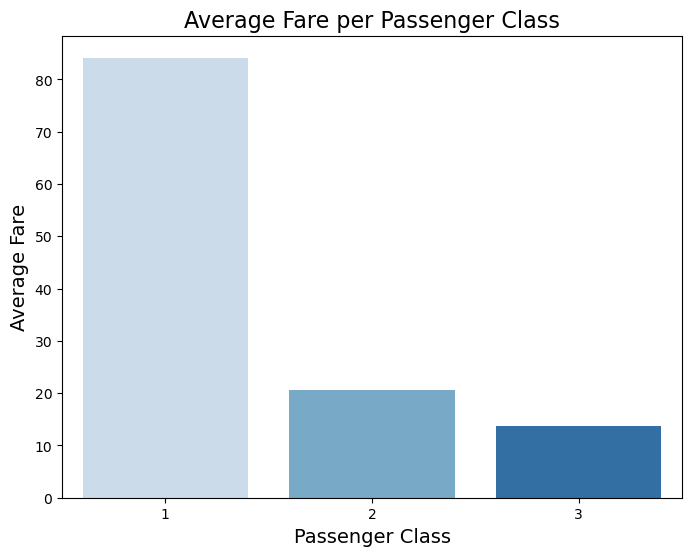

In [22]:
fare_per_class = titanic_df.groupby('pclass')['fare'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='pclass', y='fare', data=fare_per_class, palette='Blues')

# Add titles and labels
plt.title('Average Fare per Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)

# Show the plot
plt.show()